# LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
# pad_sequences 함수로 각 샘플의 길이를 100에 맞추고 부족할 때는 패딩을 추가한다.

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
# LSTM셀을 사용한 순환층을 만들기 
# 앞서 했던것중에 SimpleRNN -> LSTM 클래스로 바꾸기만 하면 됨

from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()
# SimpleRNN클래스의 모델 파라미터 개수는 200개였다. LSTM 셀에는 작은 셀이 4개 있으므로 
# 정확히 4배가 늘어 모델 파라미터 개수는 800개이다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 10ms/step - loss: 0.6925 - accuracy: 0.5349 - val_loss: 0.6915 - val_accuracy: 0.5964
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6897 - accuracy: 0.6180 - val_loss: 0.6871 - val_accuracy: 0.6374
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6766 - accuracy: 0.6175 - val_loss: 0.6568 - val_accuracy: 0.6194
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6231 - accuracy: 0.6952 - val_loss: 0.6087 - val_accuracy: 0.7314
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5917 - accuracy: 0.7434 - val_loss: 0.5870 - val_accuracy: 0.7400
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5724 - accuracy: 0.7523 - val_loss: 0.5703 - val_accuracy: 0.7452
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5562 - accuracy: 0.7583 - val_loss: 0.5544 - val_accuracy: 0.752

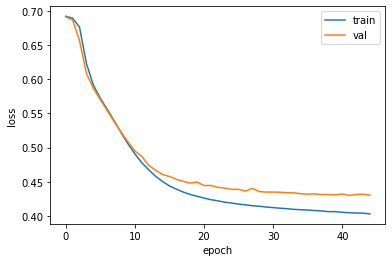

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 과대적합을 억제하면서 훈련을 잘 수행함

## 순환층에 드롭아웃 적용하기

In [6]:
# 더 강하게 과대적합을 억제해보자

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6925 - accuracy: 0.5247 - val_loss: 0.6913 - val_accuracy: 0.5858
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6886 - accuracy: 0.6159 - val_loss: 0.6848 - val_accuracy: 0.6578
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6668 - accuracy: 0.6712 - val_loss: 0.6338 - val_accuracy: 0.6920
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6011 - accuracy: 0.7102 - val_loss: 0.5873 - val_accuracy: 0.7128
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5730 - accuracy: 0.7285 - val_loss: 0.5611 - val_accuracy: 0.7436
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5516 - accuracy: 0.7426 - val_loss: 0.5407 - val_accuracy: 0.7568
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5325 - accuracy: 0.7546 - val_loss: 0.5224 - val_accuracy: 0.767

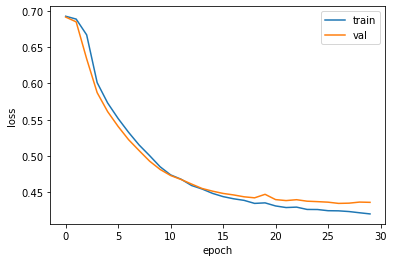

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 드롭아웃이 효과를 발휘했다.

## 2개의 층을 연결하기

In [10]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))  # 케라스의 순황층에서 모든 타임스텝의 은닉 상태를 출력하려면 True
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 17ms/step - loss: 0.6928 - accuracy: 0.5340 - val_loss: 0.6923 - val_accuracy: 0.5810
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6904 - accuracy: 0.5982 - val_loss: 0.6874 - val_accuracy: 0.6116
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6726 - accuracy: 0.6265 - val_loss: 0.6493 - val_accuracy: 0.6548
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6128 - accuracy: 0.6933 - val_loss: 0.5882 - val_accuracy: 0.7128
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5692 - accuracy: 0.7249 - val_loss: 0.5540 - val_accuracy: 0.7310
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5417 - accuracy: 0.7415 - val_loss: 0.5275 - val_accuracy: 0.7582
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5217 - accuracy: 0.7552 - val_loss: 0.5137 - val_accuracy:

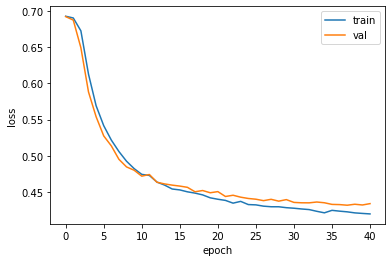

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 구조

In [15]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6926 - accuracy: 0.5234 - val_loss: 0.6920 - val_accuracy: 0.5448
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6911 - accuracy: 0.5604 - val_loss: 0.6902 - val_accuracy: 0.5632
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6884 - accuracy: 0.5882 - val_loss: 0.6871 - val_accuracy: 0.5918
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6838 - accuracy: 0.6078 - val_loss: 0.6816 - val_accuracy: 0.6030
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6759 - accuracy: 0.6255 - val_loss: 0.6721 - val_accuracy: 0.6172
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6622 - accuracy: 0.6422 - val_loss: 0.6562 - val_accuracy: 0.6348
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6381 - accuracy: 0.6672 - val_loss: 0.6258 - val_accuracy: 0.662

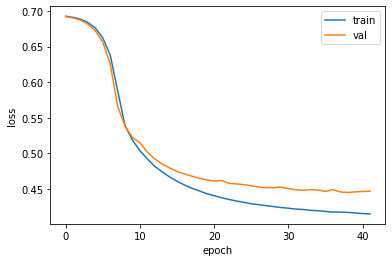

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## LSTM과 GRU셀로 훈련

In [21]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

OSError: ignored